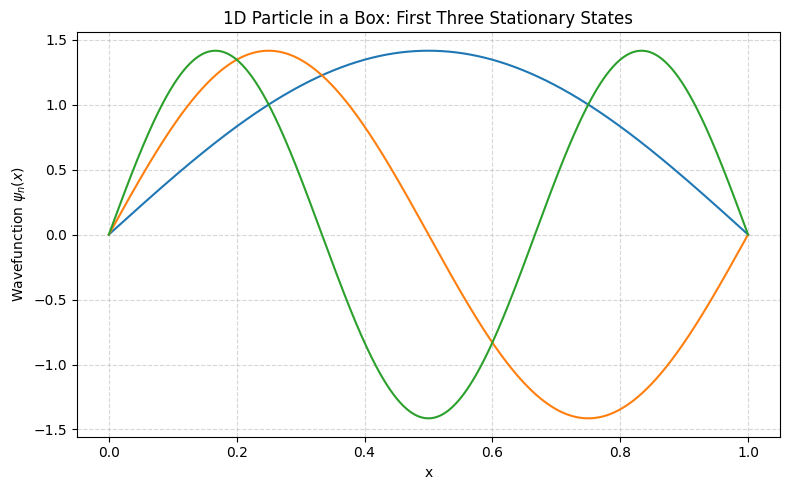

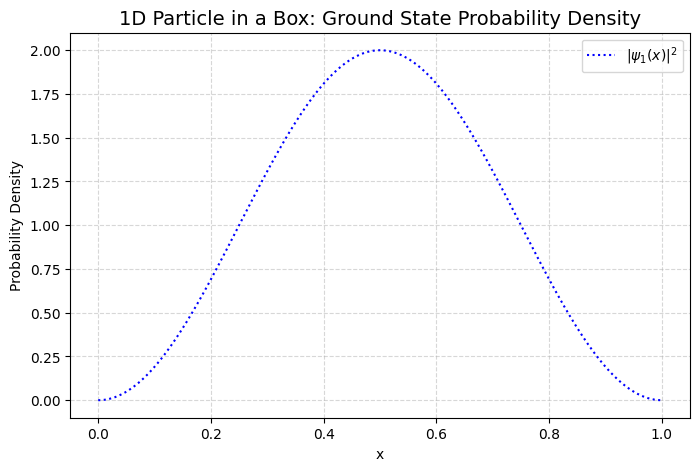

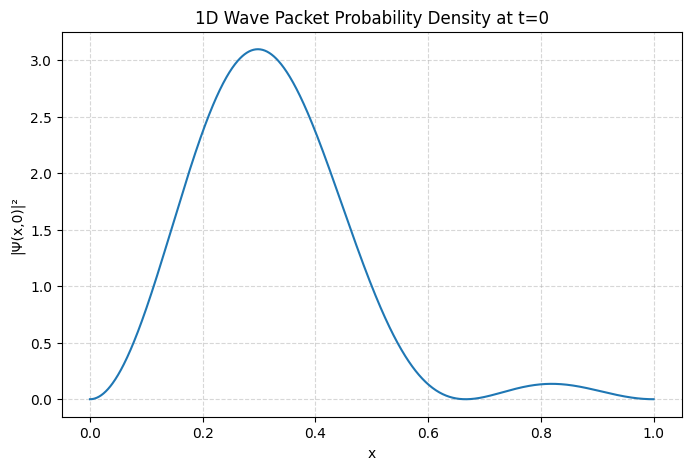

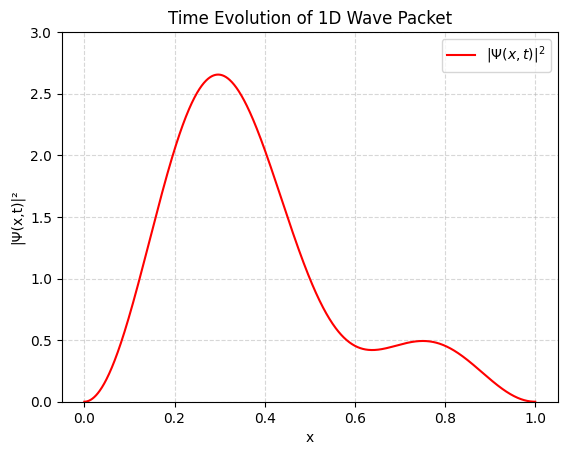

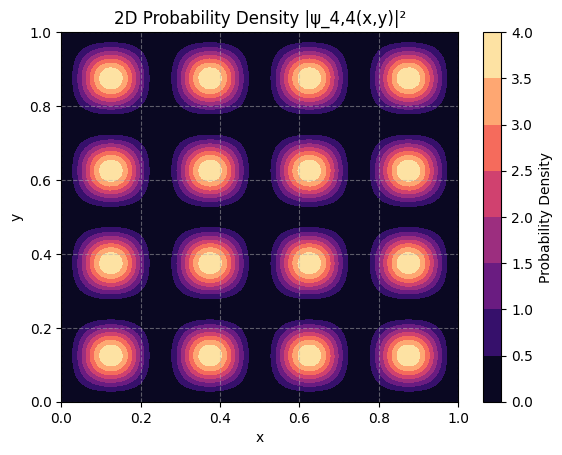

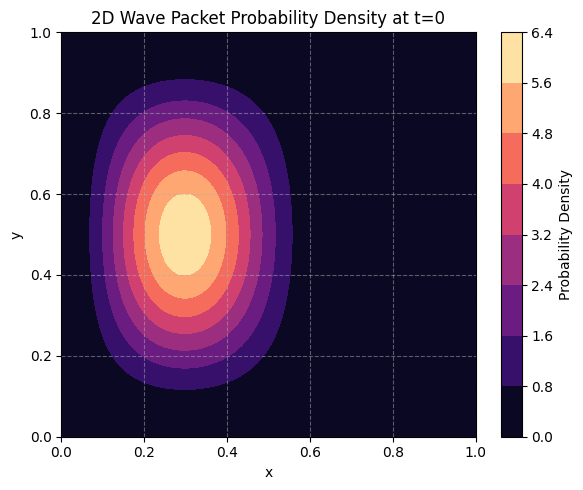

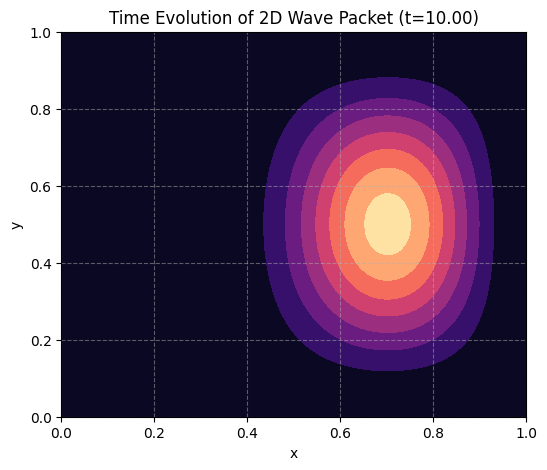

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pathlib import Path
import os
try:
    base_dir = Path().resolve().parent
except NameError:
    base_dir = Path(__file__).parent.parent.resolve()
plots_dir = base_dir / 'plots'
simulations_dir = base_dir / 'simulations'
anim_dir =  base_dir / 'animations'
os.makedirs(plots_dir, exist_ok = True)
os.makedirs(simulations_dir, exist_ok = True)
os.makedirs(anim_dir, exist_ok = True)

# Parameters

L = 1
m = 1
hbar = 1
n_max = 5
x = np.linspace(0, L, 1000)

# Functions

def energy(n):
    return (n**2 * np.pi**2 * hbar**2) / (2*m*L**2)
def psi(n, x):
    return np.sqrt(2/L) * np.sin(n * np.pi * x / L)

# Plot first three stationary wavefunctions

plt.figure(figsize = (8,5))
for n in range(1, 4):
    plt.plot(x, psi(n, x))
plt.xlabel('x')
plt.ylabel(r'Wavefunction $\psi_n(x)$')
plt.title('1D Particle in a Box: First Three Stationary States')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plot_file = plots_dir / '1D_stationary_states.png'
plt.savefig(plot_file, dpi=300)
plt.show()

# Plot ground state probability density

plt.figure(figsize = (8,5))
plt.plot(x, psi(1, x)**2, color = 'blue', linestyle = ':', label=r'$|\psi_1(x)|^2$')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('1D Particle in a Box: Ground State Probability Density', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plot_file = plots_dir / '1D_probability_ground.png'
plt.savefig(plot_file, dpi=300)
plt.show()

# Time-dependent wavefunction (superposition of first two states)

c1, c2 = 1/np.sqrt(2), 1/np.sqrt(2)
def psi_t(x, t):
    return c1*psi(1,x)*np.exp(-1j*energy(1)*t/hbar) + c2*psi(2,x)*np.exp(-1j*energy(2)*t/hbar)

# Plot initial 1D wave packet probability density at t=0

plt.figure(figsize=(8,5))
plt.plot(x, np.abs(psi_t(x,0))**2)
plt.xlabel('x')
plt.ylabel('|Ψ(x,0)|²')
plt.title('1D Wave Packet Probability Density at t=0')
plt.grid(True, linestyle='--', alpha = 0.5)
plot_file = plots_dir / '1D_probability_t0.png'
plt.savefig(plot_file, dpi=300)
plt.show()

# Animate time evolution of the 1D wave packet

fig, ax = plt.subplots()
line, = ax.plot(x, np.abs(psi_t(x, 0))**2, label=r'$|\Psi(x,t)|^2$', color = 'red')
ax.set_ylim(0,3)
ax.set_xlabel('x')
ax.set_ylabel('|Ψ(x,t)|²')
ax.set_title('Time Evolution of 1D Wave Packet')
ax.grid(True, linestyle = '--', alpha=0.5)
ax.legend()
def animate(t):
    line.set_ydata(np.abs(psi_t(x,t))**2)
    return line
anim = animation.FuncAnimation(fig, animate, frames = np.linspace(0, 20, 200), interval = 100)
anim_file = anim_dir / '1D_wave_packet.gif'
anim.save(anim_file, writer = 'pillow', dpi = 300)
plt.show()

# 2D probability density plot

Lx, Ly = 1.0, 1.0
nx, ny = 4, 4
x2 = np.linspace(0, Lx, 100)
y2 = np.linspace(0, Ly, 100)
X, Y = np.meshgrid(x2, y2)
psi2D = 2/np.sqrt((Lx*Ly))*np.sin(nx*np.pi*X/Lx)*np.sin(ny*np.pi*Y/Ly)   
plt.contourf(X, Y, np.abs(psi2D)**2, cmap = 'magma')
plt.colorbar(label = 'Probability Density')
plt.title(f'2D Probability Density |ψ_{nx},{ny}(x,y)|²')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='--', alpha=0.5)
plot_file = plots_dir / f'2D_probability_{nx}_{ny}.png'
plt.savefig(plot_file, dpi = 300)
plt.show()

# 2D wave packet at t = 0 plot

nx1, ny1 = 1, 1
nx2, ny2 = 2, 1
def psi2D(nx, ny, X, Y):
    return (2/np.sqrt(Lx*Ly)) * np.sin(nx*np.pi*X/Lx) * np.sin(ny*np.pi*Y/Ly)
psi2D_t0 = c1*psi2D(nx1, ny1, X, Y) + c2*psi2D(nx2, ny2, X, Y)
plt.figure(figsize = (6,5))
plt.contourf(X, Y, np.abs(psi2D_t0)**2, cmap = 'magma')
plt.colorbar(label='Probability Density')
plt.title('2D Wave Packet Probability Density at t=0')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plot_file = plots_dir / '2D_wave_packet.png'
plt.savefig(plot_file, dpi = 300)
plt.show()

# 2D wave packet animation

def energy2D(nx, ny):
    return (np.pi**2 * hbar**2 / (2*m)) * (nx**2 / Lx**2 + ny**2 / Ly**2)
fig, ax = plt.subplots(figsize = (6,5))
def animate_2D(t):
    ax.clear()
    psi_t = (c1*psi2D(nx1, ny1, X, Y)*np.exp(-1j*energy2D(nx1, ny1)*t/hbar) + c2*psi2D(nx2, ny2, X, Y)*np.exp(-1j*energy2D(nx2, ny2)*t/hbar))
    prob_density = np.abs(psi_t)**2
    mad = ax.contourf(X, Y, prob_density, cmap = 'magma')
    ax.set_title(f'Time Evolution of 2D Wave Packet (t={t:.2f})')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True, linestyle = '--', alpha = 0.5)
anim2D = animation.FuncAnimation(fig, animate_2D, frames = np.linspace(0, 10, 100), interval = 100)
anim_file = anim_dir / '2D_wave_packet.gif'
anim2D.save(anim_file, writer = 'pillow', dpi = 150)
plt.show()